# `classification.XGBoostCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [19]:
from slickml.classification import XGBoostCVClassifier

help(XGBoostCVClassifier)

Help on class XGBoostCVClassifier in module slickml.classification._xgboostcv:

class XGBoostCVClassifier(slickml.classification._xgboost.XGBoostClassifier)
 |  XGBoostCVClassifier(num_boost_round: Optional[int] = 200, metrics: Optional[str] = 'auc', sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict] = None, n_splits: Optional[int] = 4, early_stopping_rounds: Optional[int] = 20, random_state: Optional[int] = 1367, stratified: Optional[bool] = True, shuffle: Optional[bool] = True, verbose: Optional[bool] = True, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost CV Classifier.
 |  
 |  This is wrapper using ``XGBoostClassifier`` to train a XGBoost [1]_ model with using the optimum
 |  number of boosting rounds from the inputs. It used ``xgboost.cv()`` model with n-folds
 |  cross-validation and train model based on the best number of boosting round to

### Example 1: `XGBoostClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
}
clf = XGBoostCVClassifier(
    num_boost_round=333,
    metrics=("logloss"),
    params=params,
)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 236 -*- 4-Folds CV LOGLOSS: Train = 0.015 +/- 0.000 -*- Test = 0.101 +/- 0.019 *-*


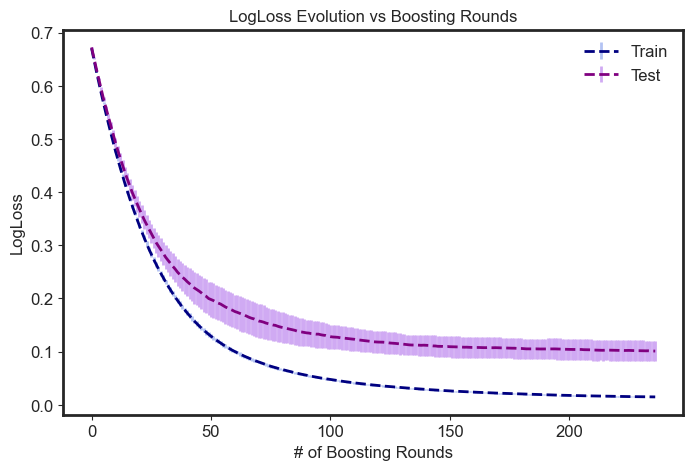

In [6]:
clf.plot_cv_results()

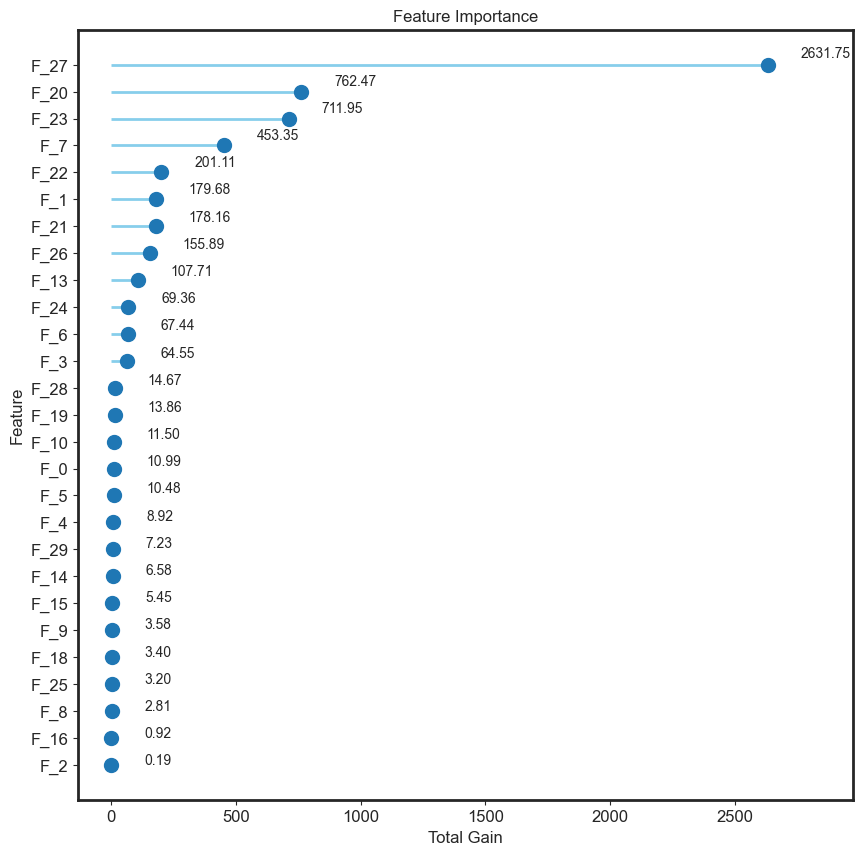

In [7]:
clf.plot_feature_importance(figsize=(10, 10))

In [8]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([0.99788994, 0.9816983 , 0.99884653, 0.00553841, 0.99708694,
       0.00137004, 0.9750494 , 0.9978477 , 0.99854386, 0.9988217 ],
      dtype=float32)

In [9]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [10]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

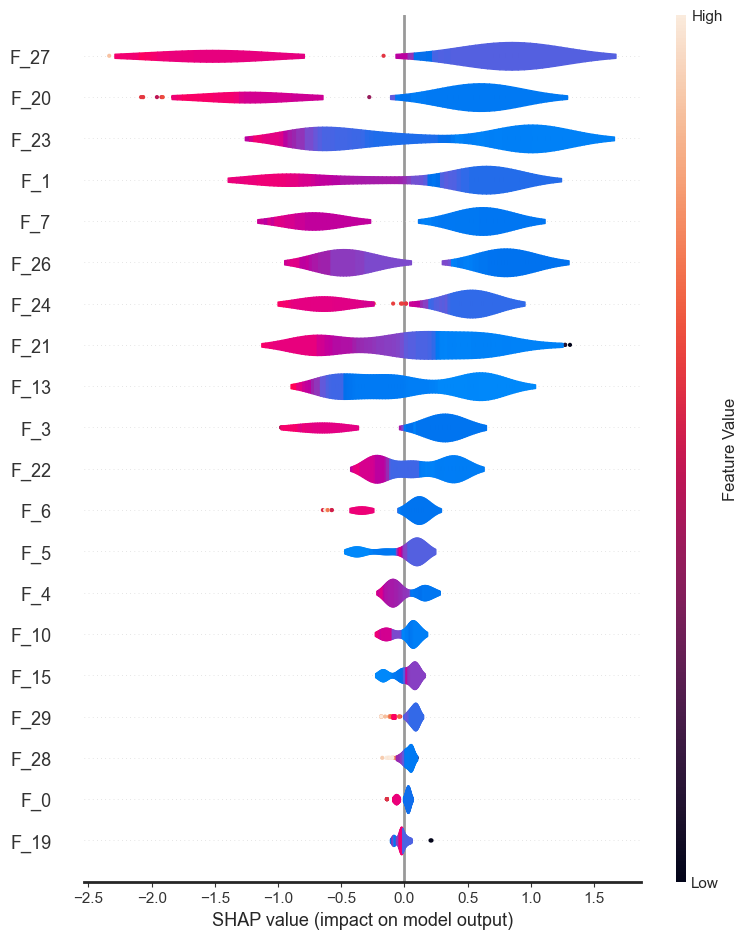

In [11]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

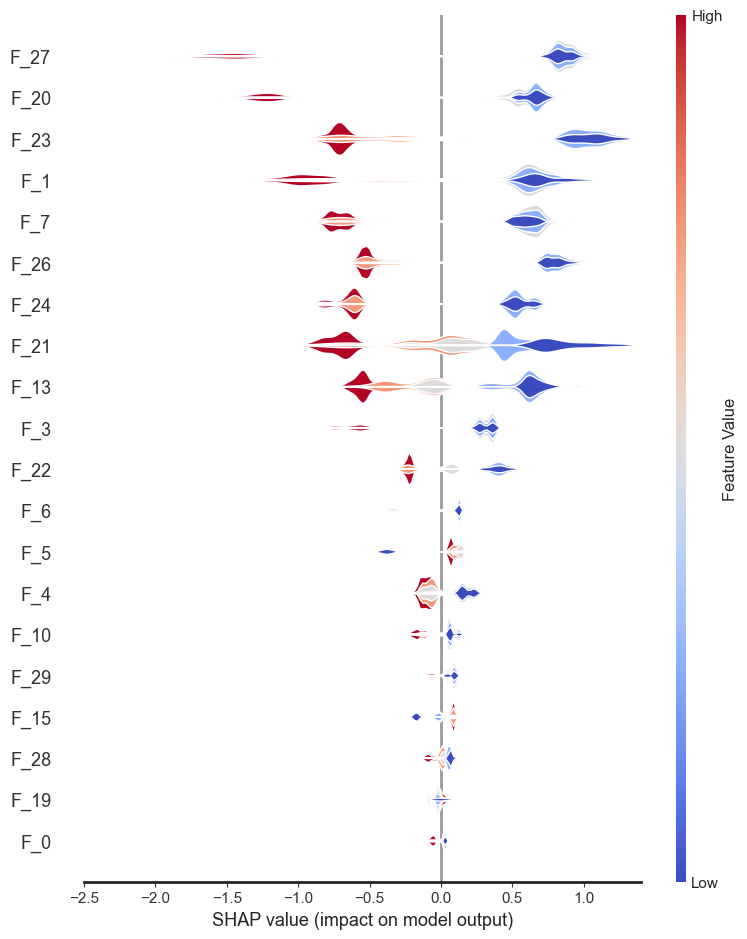

In [12]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

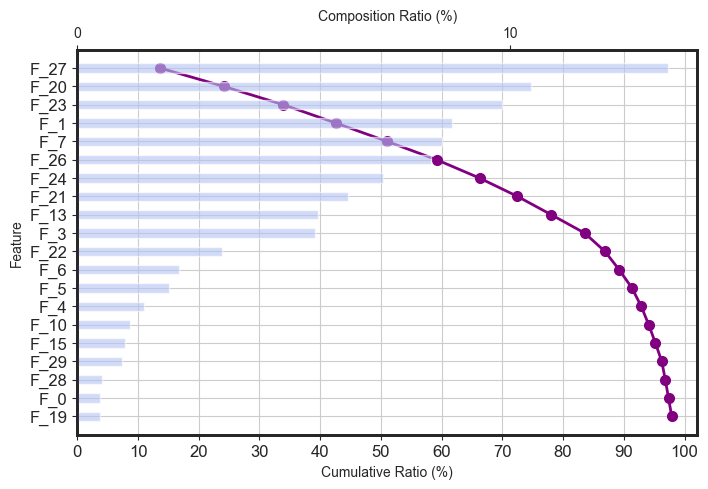

In [13]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [14]:
clf.shap_values_test_[:10]

array([[ 1.75557882e-02,  6.53871596e-01,  2.99026514e-03,
         2.74636000e-01, -1.50566459e-01,  9.55449566e-02,
         1.34634897e-01,  6.09019756e-01,  3.04762498e-02,
         1.76171474e-02, -2.35145986e-02,  0.00000000e+00,
         0.00000000e+00, -7.66683295e-02, -2.03802320e-03,
         9.80238467e-02,  1.82796782e-03,  0.00000000e+00,
         3.77169997e-02, -3.64747224e-03,  5.46218693e-01,
         7.16449738e-01,  3.77438098e-01,  9.20934141e-01,
        -6.50065064e-01,  3.11454162e-02,  8.11199009e-01,
         9.30009782e-01,  4.39625606e-02, -1.83640242e-01],
       [ 1.75557882e-02,  4.36465949e-01,  2.99026514e-03,
         2.51476616e-01,  7.30297044e-02,  1.27510071e-01,
         1.42727941e-01,  9.96910214e-01, -3.71610560e-03,
         2.54066959e-02,  8.14478099e-02,  0.00000000e+00,
         0.00000000e+00,  8.42420042e-01, -2.03802320e-03,
         7.59870932e-02,  7.62083521e-03,  0.00000000e+00,
        -1.04175853e-02,  1.70714892e-02,  6.89458787e-

In [15]:
clf.shap_values_train_[:10]

array([[ 2.71949619e-02,  6.62036180e-01,  2.99026514e-03,
         3.58346581e-01, -1.56660125e-01,  1.09679170e-01,
         1.34634897e-01, -6.25319004e-01,  3.04762498e-02,
         4.08241116e-02, -1.28543288e-01,  0.00000000e+00,
         0.00000000e+00, -4.10974681e-01, -1.86179653e-02,
        -3.60042751e-02, -4.70276643e-03,  0.00000000e+00,
         3.02350111e-02, -2.36052740e-02,  5.45534551e-01,
         8.96315992e-01,  4.13532645e-01,  9.49284732e-01,
         3.24185699e-01,  2.70771347e-02,  8.51965606e-01,
         1.03871679e+00,  5.69818392e-02,  9.28363204e-02],
       [ 3.13885808e-02,  6.89865410e-01,  2.99026514e-03,
         3.58316958e-01, -2.16606446e-02, -3.74941677e-01,
         1.13009453e-01,  4.84386623e-01,  4.75292802e-02,
         4.08241116e-02,  5.93306199e-02,  0.00000000e+00,
         0.00000000e+00,  6.08471036e-01, -2.27215234e-02,
        -1.61671087e-01, -4.70276643e-03,  0.00000000e+00,
         2.76447907e-02, -2.36052740e-02,  5.45187652e-

In [16]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
232,0.015110,0.000472,0.101539,0.019161
233,0.015050,0.000465,0.101649,0.019229
234,0.015006,0.000461,0.101345,0.019114
235,0.014963,0.000455,0.101252,0.018877
236,0.014913,0.000443,0.101126,0.018743


In [17]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_27,2631.746094
1,F_20,762.474731
2,F_23,711.949585
3,F_7,453.346375
4,F_22,201.109329
5,F_1,179.680725
6,F_21,178.164062
7,F_26,155.890793
8,F_13,107.710747
9,F_24,69.359894


In [18]:
clf.model_